## NHS Post processing Library

This notebook provides examples on how to carry out data evaluation, visualization and analysis using the post_processing python library. Be sure to go through the [Quick Start](https://nhs-postprocessing.readthedocs.io/en/latest/QuickStart.html) section of the [documentation](https://nhs-postprocessing.readthedocs.io/en/latest/index.html) for instructions on how to access and import the libary and its packages.

##### Note: 
The Library is still under active development and empty sections will be completed in Due time

### Table of content
- Requirements
- Data Manipulation(generating and obtaining the Dataframes required)
- Analysis
- Visualizations


##### All files are available in the docs/source/notebooks folder where the notebook is located

### Requirements

The conda environmnent contains all libraries associated the post processing library. After setting up the conda environment, you only have to import the metrics and visualization modules from postprocessinglib.evaluation

In [1]:
### Remove and modify these later.
import sys
import pandas as pd
sys.path.append("../../../")

In [2]:
from postprocessinglib.evaluation import data, metrics, visuals
# from postprocessinglib.utilities import helper_functions as hlp

From this point on, the function you use will depend on which project you are working on and what sort of data i.e., the datatype of the data, you have.

### DATA MANIPULATION

### MESH CSV files

Assuming you have a csv file containing an csv file with observed and simulated values for a list of stations of the form:
| Some datetime  | station1_obs | station1_sim | station2_obs | station2_sim |
| -------------- | ------------ | ------------ | ------------ | ------------ | 

We simply pass it into our generate dataframes function as shown below:


In [3]:
# passing a controlled csv file for testing
path = "MESH_output_streamflow_1.csv"

# assuming the simulation model needs 365 days to warm up and account for errors during the learning phase.
DATAFRAMES = data.generate_dataframes(csv_fpath=path, warm_up=365)

The start date for the Observed Data is 1980-12-31
The start date for the Simulated Data is 1980-12-31
The start date for the Merged Data is 1980-12-31


In this case, because we dont pass in aggregation parameters, we end up with the three default dataframnes in our dictionary; the merged dataframe, the observed data and the simulated data

In [4]:
print("The Merged dataframe: \n")
print(DATAFRAMES["DF"])
print("The Observed dataframe: \n")
print(DATAFRAMES["DF_OBSERVED"])
print("\nThe Simulated dataframe: \n")
print(DATAFRAMES["DF_SIMULATED"])

The Merged dataframe: 

            QOMEAS_05BB001  QOSIM_05BB001  QOMEAS_05BA001  QOSIM_05BA001
1980-12-31           10.20       2.530770             NaN       1.006860
1981-01-01            9.85       2.518999             NaN       1.001954
1981-01-02           10.20       2.507289             NaN       0.997078
1981-01-03           10.00       2.495637             NaN       0.992233
1981-01-04           10.10       2.484073             NaN       0.987417
...                    ...            ...             ...            ...
2017-12-27             NaN       4.418050             NaN       1.380227
2017-12-28             NaN       4.393084             NaN       1.372171
2017-12-29             NaN       4.368303             NaN       1.364174
2017-12-30             NaN       4.343699             NaN       1.356237
2017-12-31             NaN       4.319275             NaN       1.348359

[13515 rows x 4 columns]
The Observed dataframe: 

            QOMEAS_05BB001  QOMEAS_05BA001
1980-

The Simulated and Observed dataframes are particularly important in the calculation of our metrics

In [5]:
# You are also  able to generate the dataframes for a given period of time i.e from a start date, till an end date
# and everything in between
DATAFRAMES_January2010 = data.generate_dataframes(csv_fpath=path, warm_up=365, start_date='2010-01-01' , end_date='2010-1-31')
DATAFRAMES_till2009 = data.generate_dataframes(csv_fpath=path, warm_up=365, end_date='2009-12-31')
DATAFRAMES_from1995 = data.generate_dataframes(csv_fpath=path, warm_up=365, start_date='1995-01-01')

The start date for the Observed Data is 2010-01-01
The start date for the Simulated Data is 2010-01-01
The start date for the Merged Data is 2010-01-01
The start date for the Observed Data is 1980-12-31
The start date for the Simulated Data is 1980-12-31
The start date for the Merged Data is 1980-12-31
The start date for the Observed Data is 1995-01-01
The start date for the Simulated Data is 1995-01-01
The start date for the Merged Data is 1995-01-01


In [6]:
print("The Merged dataframe for January 2010: \n")
print(DATAFRAMES_January2010["DF"])
print("The Observed dataframe for January 2010: \n")
print(DATAFRAMES_January2010["DF_OBSERVED"])
print("\nThe Simulated dataframe for January 2010: \n")
print(DATAFRAMES_January2010["DF_OBSERVED"])

The Merged dataframe for January 2010: 

            QOMEAS_05BB001  QOSIM_05BB001  QOMEAS_05BA001  QOSIM_05BA001
2010-01-01             NaN       4.000698             NaN       0.793435
2010-01-02             NaN       3.978494             NaN       0.789141
2010-01-03             NaN       3.956450             NaN       0.784877
2010-01-04             NaN       3.934558             NaN       0.780643
2010-01-05             NaN       3.912824             NaN       0.776437
2010-01-06             NaN       3.891242             NaN       0.772261
2010-01-07             NaN       3.869810             NaN       0.768114
2010-01-08             NaN       3.848532             NaN       0.763995
2010-01-09             NaN       3.827400             NaN       0.759905
2010-01-10             NaN       3.806418             NaN       0.755842
2010-01-11             NaN       3.785582             NaN       0.751808
2010-01-12             NaN       3.764892             NaN       0.747801
2010-01-13

In [7]:
print("The Merged dataframe until 2009: \n")
print(DATAFRAMES_till2009["DF"])
print("The Observed dataframe until 2009: \n")
print(DATAFRAMES_till2009["DF_OBSERVED"])
print("\nThe Simulated dataframe until 2009: \n")
print(DATAFRAMES_till2009["DF_SIMULATED"])

The Merged dataframe until 2009: 

            QOMEAS_05BB001  QOSIM_05BB001  QOMEAS_05BA001  QOSIM_05BA001
1980-12-31           10.20       2.530770             NaN       1.006860
1981-01-01            9.85       2.518999             NaN       1.001954
1981-01-02           10.20       2.507289             NaN       0.997078
1981-01-03           10.00       2.495637             NaN       0.992233
1981-01-04           10.10       2.484073             NaN       0.987417
...                    ...            ...             ...            ...
2009-12-27             NaN       4.114114             NaN       0.815359
2009-12-28             NaN       4.091105             NaN       0.810912
2009-12-29             NaN       4.068261             NaN       0.806497
2009-12-30             NaN       4.045577             NaN       0.802113
2009-12-31             NaN       4.023057             NaN       0.797758

[10593 rows x 4 columns]
The Observed dataframe until 2009: 

            QOMEAS_05BB001

In [8]:
print("The Merged dataframe from 1995: \n")
print(DATAFRAMES_from1995["DF"])
print("The Observed dataframe from 1995: \n")
print(DATAFRAMES_from1995["DF_OBSERVED"])
print("\nThe Simulated dataframe from 1995: \n")
print(DATAFRAMES_from1995["DF_SIMULATED"])

The Merged dataframe from 1995: 

            QOMEAS_05BB001  QOSIM_05BB001  QOMEAS_05BA001  QOSIM_05BA001
1995-01-01            8.37       3.170254             NaN       0.884237
1995-01-02           10.10       3.153162             NaN       0.879155
1995-01-03           12.20       3.136179             NaN       0.874110
1995-01-04           13.00       3.119328             NaN       0.869102
1995-01-05           13.20       3.102574             NaN       0.864132
...                    ...            ...             ...            ...
2017-12-27             NaN       4.418050             NaN       1.380227
2017-12-28             NaN       4.393084             NaN       1.372171
2017-12-29             NaN       4.368303             NaN       1.364174
2017-12-30             NaN       4.343699             NaN       1.356237
2017-12-31             NaN       4.319275             NaN       1.348359

[8401 rows x 4 columns]
The Observed dataframe from 1995: 

            QOMEAS_05BB001  Q

You are also able to go a step further by aggregating your data right from the beggining by using the optional arguments 

In [9]:
## Lets use a time period of 1981 to 1990 to demonstrate this
DATAFRAMES = data.generate_dataframes(csv_fpath=path, warm_up=365, start_date = "1981-01-01", end_date = "1990-12-31",
                                      # optional arguments
                                      # lets see a weekly aggregation
                                      daily_agg = True, da_method = 'min',
                                      # lets see a weekly aggregation
                                      weekly_agg = True, wa_method = 'min',
                                      # lets also see monthly aggregation
                                      monthly_agg = True, ma_method = 'inst',
                                      # lets also see yearly aggregation
                                      yearly_agg = True, ya_method = 'sum'
                                      # note that without inputing the respective methods,
                                      # the functions default to mean as the method of aggregation
                                     )
for key, value in DATAFRAMES.items():
    print(f"{key}:\n{value}")
    
# You can uncomment these lines to help with manual confirmation of the data generated 
# DATAFRAMES["DF_WEEKLY"].to_csv('weekly_df.csv')
# DATAFRAMES["DF_MONTHLY"].to_csv('monthly_df.csv')
# DATAFRAMES["DF_YEARLY"].to_csv('yearly_df.csv')

The start date for the Observed Data is 1981-01-01
The start date for the Simulated Data is 1981-01-01
The start date for the Merged Data is 1981-01-01
DF:
            QOMEAS_05BB001  QOSIM_05BB001  QOMEAS_05BA001  QOSIM_05BA001
1981-01-01            9.85       2.518999             NaN       1.001954
1981-01-02           10.20       2.507289             NaN       0.997078
1981-01-03           10.00       2.495637             NaN       0.992233
1981-01-04           10.10       2.484073             NaN       0.987417
1981-01-05            9.99       2.472571             NaN       0.982631
...                    ...            ...             ...            ...
1990-12-27           10.10       6.615961             NaN       1.737144
1990-12-28            9.50       6.573054             NaN       1.725025
1990-12-29            8.60       6.530500             NaN       1.713013
1990-12-30            8.20       6.488300             NaN       1.701107
1990-12-31            8.25       6.446449

Observe how the methods inputed dictate the means of aggregation

We are also able to obtain a seasonal period from this step as show below 

In [10]:
DATAFRAMES = data.generate_dataframes(csv_fpath=path, warm_up=365, start_date = "1981-01-01", end_date = "1990-12-31",
                                      # seasonal aggregation
                                      # obtaining the month of January from every year from 1981 to 1985
                                      seasonal_p = True, sp_dperiod = ('04-01', '08-30'),
                                      sp_subset = ('1981-01-01', '1985-12-31')
                                      # if the time range is not specified, it will return the daily period
                                      # for the whole data whose time frame might be specified by the start and
                                      # end date parameters
                                     )
for key, value in DATAFRAMES.items():
    print(f"{key}:\n{value}")

# You can uncomment this line to help with manual confirmation of the data generated 
# DATAFRAMES["DF_CUSTOM"].to_csv('seasonal_df.csv')
# DATAFRAMES["DF_CUSTOM"].head(40)

The start date for the Observed Data is 1981-01-01
The start date for the Simulated Data is 1981-01-01
The start date for the Merged Data is 1981-01-01
DF:
            QOMEAS_05BB001  QOSIM_05BB001  QOMEAS_05BA001  QOSIM_05BA001
1981-01-01            9.85       2.518999             NaN       1.001954
1981-01-02           10.20       2.507289             NaN       0.997078
1981-01-03           10.00       2.495637             NaN       0.992233
1981-01-04           10.10       2.484073             NaN       0.987417
1981-01-05            9.99       2.472571             NaN       0.982631
...                    ...            ...             ...            ...
1990-12-27           10.10       6.615961             NaN       1.737144
1990-12-28            9.50       6.573054             NaN       1.725025
1990-12-29            8.60       6.530500             NaN       1.713013
1990-12-30            8.20       6.488300             NaN       1.701107
1990-12-31            8.25       6.446449

Again observe how there is always an observed and simulated dataframe

If the above weekly and daily aggregations werent done at the beginning you are also able to do them whenever you want during your evaluation using their respective functions 

In [11]:
# calculating the daily aggregate outside the generate dataframe function
merged_df = DATAFRAMES["DF"]
print(merged_df)
print(data.daily_aggregate(df=merged_df))

            QOMEAS_05BB001  QOSIM_05BB001  QOMEAS_05BA001  QOSIM_05BA001
1981-01-01            9.85       2.518999             NaN       1.001954
1981-01-02           10.20       2.507289             NaN       0.997078
1981-01-03           10.00       2.495637             NaN       0.992233
1981-01-04           10.10       2.484073             NaN       0.987417
1981-01-05            9.99       2.472571             NaN       0.982631
...                    ...            ...             ...            ...
1990-12-27           10.10       6.615961             NaN       1.737144
1990-12-28            9.50       6.573054             NaN       1.725025
1990-12-29            8.60       6.530500             NaN       1.713013
1990-12-30            8.20       6.488300             NaN       1.701107
1990-12-31            8.25       6.446449             NaN       1.689308

[3652 rows x 4 columns]
          QOMEAS_05BB001  QOSIM_05BB001  QOMEAS_05BA001  QOSIM_05BA001
1981/001            9.85    

In [12]:
# We are also able to do the same weekly...
# Recall that the default method is mean
print(data.weekly_aggregate(df=merged_df, method="min"))

         QOMEAS_05BB001  QOSIM_05BB001  QOMEAS_05BA001  QOSIM_05BA001
1981.00            9.85       2.495637             NaN       0.992233
1981.01            8.70       2.416050             NaN       0.959137
1981.02            8.24       2.339655             NaN       0.927429
1981.03            7.86       2.266305             NaN       0.897038
1981.04            7.88       2.195846             NaN       0.867900
...                 ...            ...             ...            ...
1990.48           10.80       7.504057             NaN       1.989616
1990.49            9.20       7.160021             NaN       1.891450
1990.50            8.10       6.835969             NaN       1.799404
1990.51            8.60       6.530500             NaN       1.713013
1990.52            8.20       6.446449             NaN       1.689308

[530 rows x 4 columns]


In [13]:
# Monthly...
print(data.monthly_aggregate(df=merged_df, method="inst"))

         QOMEAS_05BB001  QOSIM_05BB001  QOMEAS_05BA001  QOSIM_05BA001
1981-01            8.62       2.195846             NaN       0.867900
1981-02            7.20       1.940355             NaN       0.762678
1981-03            7.25       1.699932             NaN       0.664341
1981-04           15.30       3.859564             NaN       0.584523
1981-05          113.00     220.485800           28.20      96.363520
...                 ...            ...             ...            ...
1990-08           33.60      40.431200           10.10      23.856810
1990-09           90.90      19.438340           30.50       6.175078
1990-10           21.10       9.648046            4.01       2.642092
1990-11           12.00       7.920140            3.90       2.109938
1990-12            8.25       6.446449             NaN       1.689308

[120 rows x 4 columns]


In [14]:
# Yearly...
print(data.yearly_aggregate(df=merged_df, method="sum"))

      QOMEAS_05BB001  QOSIM_05BB001  QOMEAS_05BA001  QOSIM_05BA001
1981        10386.27    9273.383180         2424.26    4007.949313
1982        12635.47    8874.369067         3163.23    4123.606233
1983        11909.23    8214.793557         3198.17    3810.515038
1984        13298.33    7459.351671         2699.42    3431.981225
1985        13730.50    8487.241498         2992.40    3756.822014
1986        12576.84   10651.883689         3103.15    4794.825198
1987        15066.57    8947.025052         3599.74    4260.917801
1988        12642.53   10377.241643         2972.87    4614.234614
1989        10860.93   11118.336160         2624.79    5193.322199
1990        11129.76   11226.011936         2650.50    5273.448490


In [15]:
# and we are also able to obtaining a customized seasonal period from every year in a period...
print(data.seasonal_period(df=merged_df, daily_period=('01-01', '01-31'), subset = ('1981-01-01', '1985-12-31')))

            QOMEAS_05BB001  QOSIM_05BB001  QOMEAS_05BA001  QOSIM_05BA001
1981-01-01            9.85       2.518999             NaN       1.001954
1981-01-02           10.20       2.507289             NaN       0.997078
1981-01-03           10.00       2.495637             NaN       0.992233
1981-01-04           10.10       2.484073             NaN       0.987417
1981-01-05            9.99       2.472571             NaN       0.982631
...                    ...            ...             ...            ...
1985-01-27           11.40       2.734883             NaN       0.809116
1985-01-28           11.60       2.721414             NaN       0.805189
1985-01-29           11.70       2.708047             NaN       0.801287
1985-01-30           11.60       2.694749             NaN       0.797410
1985-01-31           11.60       2.681550             NaN       0.793556

[155 rows x 4 columns]


In [16]:
# and we are also able to obtaining a customized seasonal period or from select years...
print(data.seasonal_period(df=merged_df, daily_period=('01-01', '01-31'), years = [1981, 1983, 1990]))

            QOMEAS_05BB001  QOSIM_05BB001  QOMEAS_05BA001  QOSIM_05BA001
1981-01-01            9.85       2.518999             NaN       1.001954
1981-01-02           10.20       2.507289             NaN       0.997078
1981-01-03           10.00       2.495637             NaN       0.992233
1981-01-04           10.10       2.484073             NaN       0.987417
1981-01-05            9.99       2.472571             NaN       0.982631
...                    ...            ...             ...            ...
1990-01-27            7.54       3.699822             NaN       0.915264
1990-01-28            6.87       3.679186             NaN       0.909876
1990-01-29            7.02       3.658689             NaN       0.904530
1990-01-30            7.73       3.638340             NaN       0.899223
1990-01-31            7.79       3.618141             NaN       0.893957

[93 rows x 4 columns]


Finally, we are able to extract each station from the data

In [17]:
## for ease of code I will rename the variables
DATAFRAMES = data.generate_dataframes(csv_fpath=path, warm_up=365)
observed = DATAFRAMES["DF_OBSERVED"]
simulated = DATAFRAMES["DF_SIMULATED"]

The start date for the Observed Data is 1980-12-31
The start date for the Simulated Data is 1980-12-31
The start date for the Merged Data is 1980-12-31


In [18]:
# You are also able to split the data into their respective stations in the cases where you might want to do so
for station in data.station_dataframe(observed=observed, simulated=simulated):
    print(station)

            QOMEAS_05BB001  QOSIM_05BB001
1980-12-31           10.20       2.530770
1981-01-01            9.85       2.518999
1981-01-02           10.20       2.507289
1981-01-03           10.00       2.495637
1981-01-04           10.10       2.484073
...                    ...            ...
2017-12-27             NaN       4.418050
2017-12-28             NaN       4.393084
2017-12-29             NaN       4.368303
2017-12-30             NaN       4.343699
2017-12-31             NaN       4.319275

[13515 rows x 2 columns]
            QOMEAS_05BA001  QOSIM_05BA001
1980-12-31             NaN       1.006860
1981-01-01             NaN       1.001954
1981-01-02             NaN       0.997078
1981-01-03             NaN       0.992233
1981-01-04             NaN       0.987417
...                    ...            ...
2017-12-27             NaN       1.380227
2017-12-28             NaN       1.372171
2017-12-29             NaN       1.364174
2017-12-30             NaN       1.356237
2017-12-

<mark>Note: As it stands, that is the only kind of data that we it is currently able to handle. In future releases, It will be able to handle more file types including, netcdf file, shape file, arrays, and more.<mark/>

### Analysis

Because the library is in active development, there will be regular removals and additions to its features. As a rule of thumb therefore it is always a good idea to check what it can do at the time of use.

In [19]:
# We do this by calling on its available metrics
for metric in metrics.available_metrics():
    print(metric)

MSE
RMSE
MAE
NSE
NegNSE
LogNSE
NegLogNSE
KGE
NegKGE
KGE 2012
BIAS
AbsBIAS
TTP
TTCoM
SPOD


Now that we know what it can currently do, we know what we want to ask for.

##### Mean Square Error

In [20]:
# Mean square error for the first station in the data we were given
print(metrics.mse(observed=observed, simulated=simulated))

[1657.0, 730.4]


##### Root Mean Square Error

In [21]:
# lets calculate for the root mean square error for the first station in the data we were given
# The syntax goes:-
print(metrics.rmse(observed=observed, simulated=simulated))

[40.7, 27.03]


##### Mean Average Error

In [22]:
# Similarly, the mean absolute error for the first station in the data we were given will look like 
print(metrics.mae(observed=observed, simulated=simulated))

[22.13, 13.56]


##### Nash-Sutcliffe Efficiency

In [23]:
# Similarly, the Nash-Sutcliffe Efficiency for the first station in the data we were given will look like 
print(metrics.nse(observed=observed, simulated=simulated))

[0.002181, -4.825]


##### Kling-Gupta Efficiency

In [24]:
# Similarly, the Kling-Gupta Efficiency for the first station in the data we were given will look like 
print(metrics.kge(observed=observed, simulated=simulated))

[0.4906, -0.7628]


##### The Updated Kling-Gupta Efficiency (2012)

In [25]:
# Similarly, the Kling-Gupta Efficiency for the first station in the data we were given will look like 
print(metrics.kge_2012(observed=observed, simulated=simulated))

[0.2781, -0.1909]


##### Percentage Bias

In [26]:
# Similarly, the Percentage Bias for the first station in the data we were given will look like 
print(metrics.bias(observed=observed, simulated=simulated))

# Observed that it returns the percentage not the actual value i.e 27% not 0.27

[-27.05, 31.55]


##### Time to Peak

In [27]:
# Similarly, the Time to Peak for the simulated data from the first station in the data we were given will look like 
print(metrics.time_to_peak(df=simulated))

# The time to peak for the observed data for the same station looks like:-
print(metrics.time_to_peak(df=observed))

[187.0, 173.0]
[158.0, 171.0]


##### Time to Centre of Mass

In [28]:
# Similarly, the Time to Peak for the simulated data from the first station in the data we were given will look like 
print(metrics.time_to_centre_of_mass(df=simulated))

# The time to peak for the observed data for the same station looks like:-
print(metrics.time_to_centre_of_mass(df=observed))

[193.0, 192.0]
[183.0, 200.0]


##### Spring Pulse Onset Delay

In [29]:
# Similarly, the Time to Peak for the simulated data from the first station in the data we were given will look like 
print(metrics.SpringPulseOnset(df=simulated))

# The time to peak for the observed data for the same station looks like:-
print(metrics.SpringPulseOnset(df=observed))

[136.0, 136.19444444444446, 143.0, 142.94444444444446]
[136.0, 136.26666666666668, nan, nan]


C:\Users\udenzeU\AppData\Local\anaconda3\envs\postprocessing\Lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\udenzeU\AppData\Local\anaconda3\envs\postprocessing\Lib\site-packages\numpy\core\_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


##### Multiple metrics

In [30]:
# You are also able to calculate possible available metrics 
for key, value in metrics.calculate_all_metrics(observed=observed, simulated=simulated).items():
    print(f"{key}: {value}")

MSE: [1657.0, 730.4]
RMSE: [40.7, 27.03]
MAE: [22.13, 13.56]
NSE: [0.002181, -4.825]
NegNSE: [-0.002181, 4.825]
LogNSE: [-0.2379, -0.8608]
NegLogNSE: [0.2379, 0.8608]
KGE: [0.4906, -0.7628]
NegKGE: [-0.4906, 0.7628]
KGE 2012: [0.2781, -0.1909]
BIAS: [-27.05, 31.55]
AbsBIAS: [27.05, 31.55]
TTP_obs: [158.0, 171.0]
TTP_sim: [187.0, 173.0]
TTCoM_obs: [183.0, 200.0]
TTCoM_sim: [193.0, 192.0]
SPOD_obs: [136.0, 136.26666666666668, nan, nan]
SPOD_sim: [136.0, 136.19444444444446, 143.0, 142.94444444444446]


Note: There will be an option to have this returned in a text file for easy observation in the coming days

In [31]:
# Naturally, you are also able to calculate a few metrics at a time but putting then in a list and passing them into the function
# as shown below
metrices = ["MSE", "RMSE", "MAE", "NSE", "NegNSE", "LogNSE"]
for key, value in metrics.calculate_metrics(observed=observed, simulated=simulated, metrices=metrices).items():
    print(f"{key}: {value}")

MSE: [1657.0, 730.4]
RMSE: [40.7, 27.03]
MAE: [22.13, 13.56]
NSE: [0.002181, -4.825]
NegNSE: [-0.002181, 4.825]
LogNSE: [-0.2379, -0.8608]


### Visualizations

<mark>Note: The visualization modules are still under review<mark/>

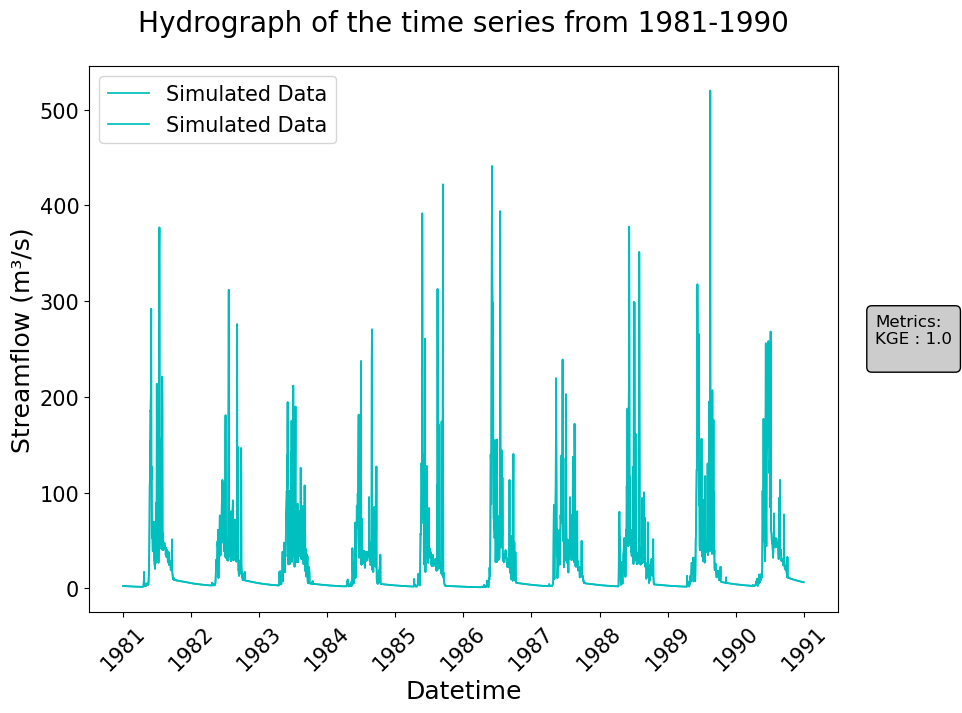

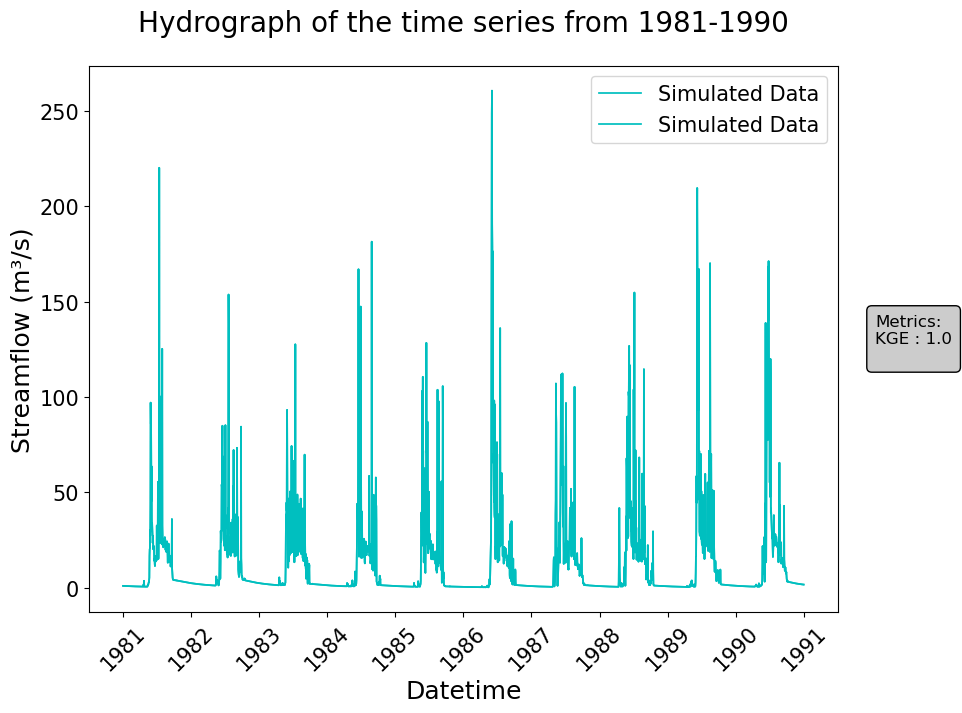

In [32]:
visuals.plot(
    # merged_df = DATAFRAMES["DF"]['1981-01-01':'1990-12-31'],
    df = DATAFRAMES["DF_SIMULATED"]['1981-01-01':'1990-12-31'],
    title='Hydrograph of the time series from 1981-1990',
    # linestyles=['r-', 'b-'],
    linestyles=['c-'],
    labels=['Datetime', 'Streamflow'],
    metrices=['KGE'],
    # linewidth = [.75, 1.25],
    linewidth = [1.25],
    )

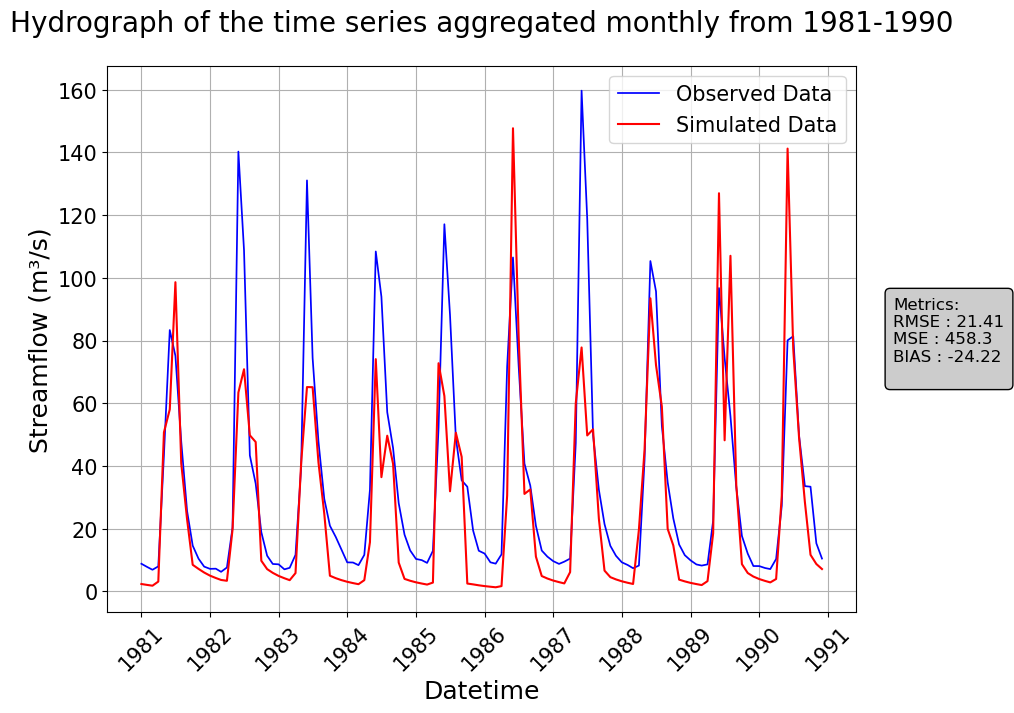

In [43]:
sim_monthly = data.monthly_aggregate(df=simulated)
obs_monthly = data.monthly_aggregate(df=observed)
Stations_by_monthly = data.station_dataframe(observed=obs_monthly, simulated=sim_monthly)
# plot of the second station in the dataframe within the time period aggregated monthly by mean(default)
visuals.plot(merged_df = Stations_by_monthly[0]['1981-01':'1990-12'],
            title='Hydrograph of the time series aggregated monthly from 1981-1990',
            linestyles=['r-', 'b-'],
            labels=['Datetime', 'Streamflow'],
            metrices=['RMSE', 'MSE', 'PBIAS'],
            grid = True
            )

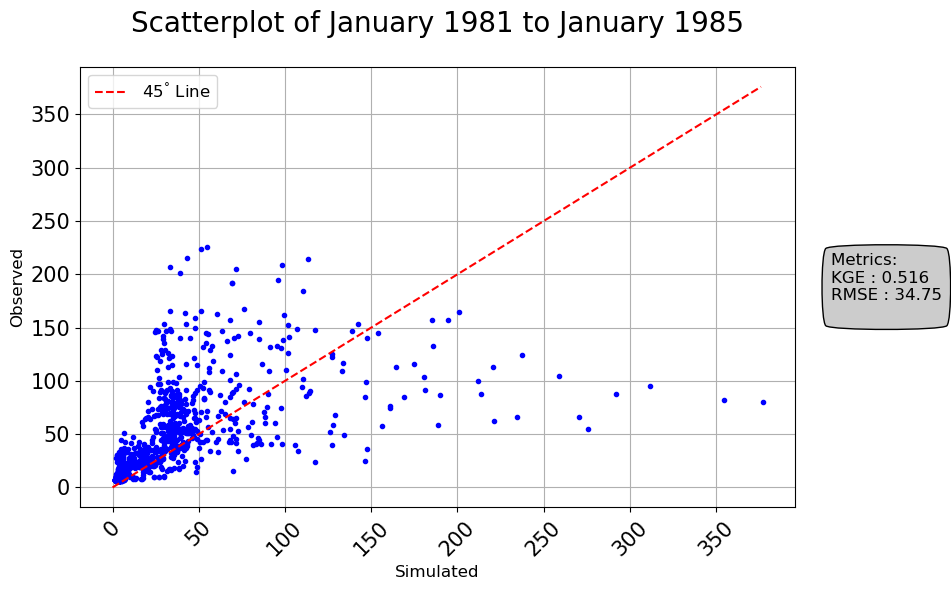

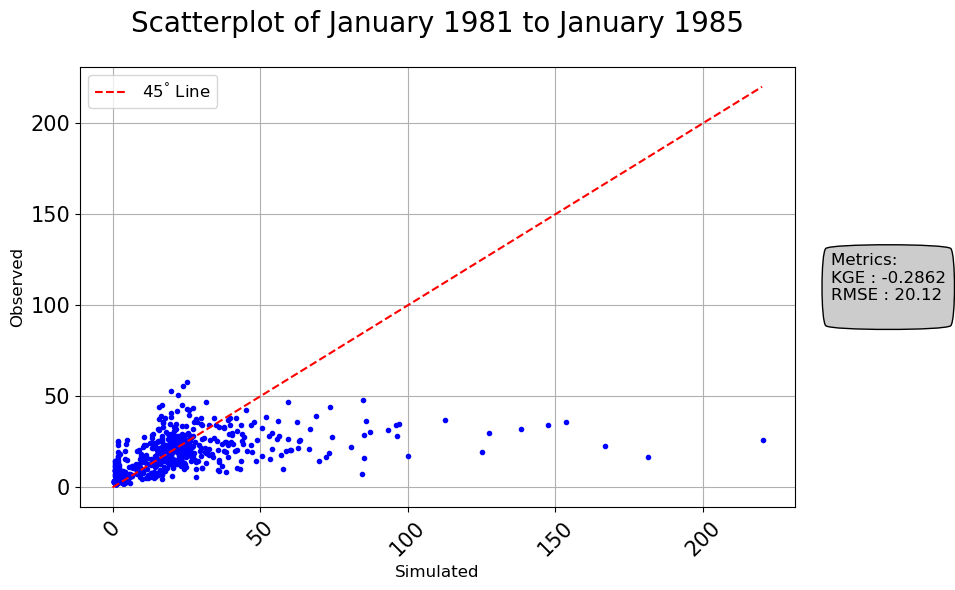

In [34]:
visuals.scatter(merged_df = DATAFRAMES['DF']['1981-01-01':'1985-01-31'],
               grid = True,
               labels = ("Simulated", "Observed"),
               markerstyle = 'b.',
               title = "Scatterplot of January 1981 to January 1985",
               line45 = True,
               metrices = ['KGE', 'RMSE'],
               )

In [35]:
# There is an optional dependency required with using read_excel so first we install it
!pip install openpyxl

path_output_2 = "MESH_output_streamflow_2.csv"
path_input_2 = "Station_data.xlsx"


#### Newer data
DATA_2 = data.generate_dataframes(csv_fpath=path_output_2, warm_up=365,
                                 # long term
                                 long_term = True, lt_method = ["q33.33", "median" ,'q75' ,'Q25' ,'q33' ],)
Stations_2 = pd.read_excel(io=path_input_2)

ignore = []
for i in range(0, len(Stations_2)):
    if Stations_2['Properties'][i] == 'X':
        ignore.append(i)

Stations_2 = Stations_2.drop(Stations_2[Stations_2['Properties'] == 'X'].index)
Stations_2 = Stations_2.set_index('Station Number')

for i in reversed(ignore):
    DATA_2['DF'] = DATA_2['DF'].drop(columns = DATA_2['DF'].columns[[2*i, 2*i+1]])
    DATA_2["DF_OBSERVED"] = DATA_2["DF_OBSERVED"].drop(columns = DATA_2['DF_OBSERVED'].columns[i])
    DATA_2['DF_SIMULATED']  = DATA_2["DF_SIMULATED"].drop(columns = DATA_2['DF_SIMULATED'].columns[i]) 


The start date for the Observed Data is 1982-10-02
The start date for the Simulated Data is 1982-10-02
The start date for the Merged Data is 1982-10-02


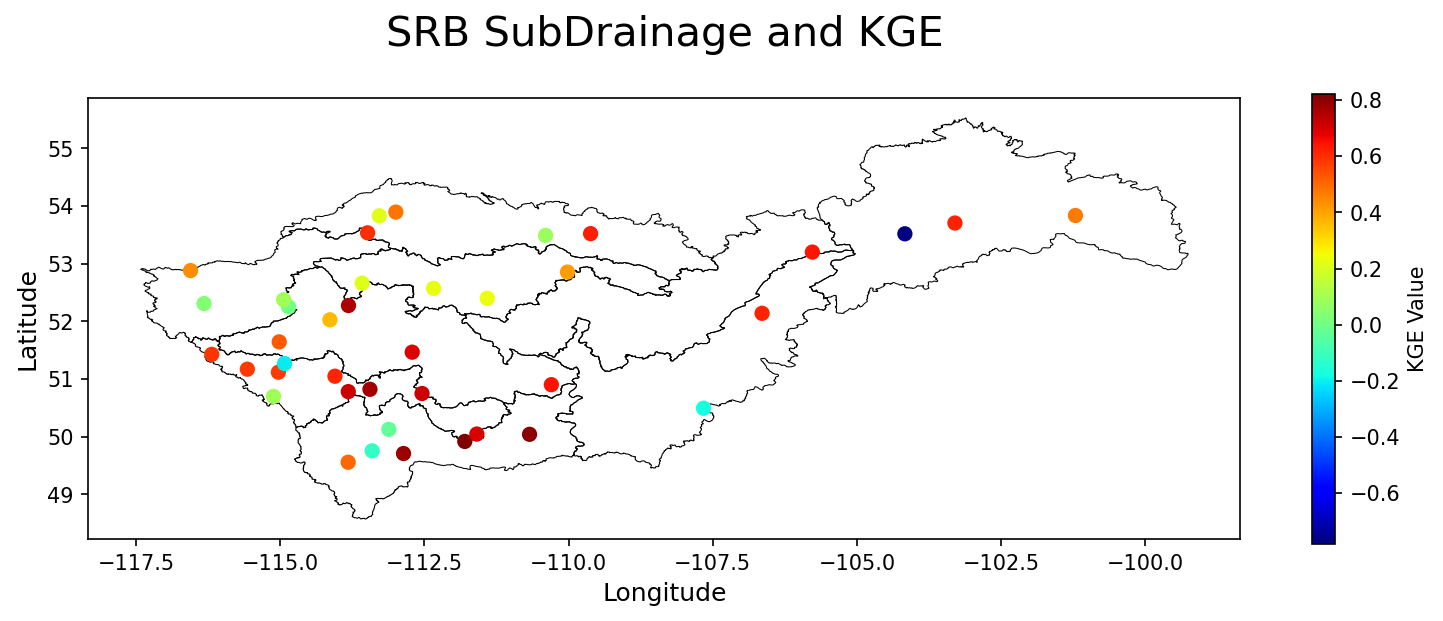

In [36]:
shapefile_path = r"SaskRB_SubDrainage2.shp"

visuals.scatter(shapefile_path = shapefile_path,
                        title = "SRB SubDrainage and KGE",
                        x_axis = Stations_2["Lon"],
                        y_axis = Stations_2["Lat"],
                        metric = "KGE",
                        fig_size = (24, 30),
                        observed = DATA_2["DF_OBSERVED"],
                        simulated = DATA_2["DF_SIMULATED"],
                        labels=['Longitude', 'Latitude'],
                    )

In [37]:
DATAFRAMES = data.generate_dataframes(csv_fpath=path_output_2, warm_up=365, start_date = "1981-01-01", end_date = "1990-12-31",
                                      # optional arguments
                                      # lets see a weekly aggregation
                                      daily_agg = True, da_method = 'min',
                                      # lets see a weekly aggregation
                                      weekly_agg = True, wa_method = 'min',
                                      # lets also see monthly aggregation
                                      monthly_agg = True, ma_method = 'inst',
                                      # lets also see yearly aggregation
                                      yearly_agg = True, ya_method = 'sum',
                                      # seasonal aggregation
                                      # obtaining the month of January from every year from 1981 to 1985
                                      seasonal_p = True, sp_dperiod = ('04-01', '08-30'),
                                      sp_subset = ('1981-01-01', '1985-12-31'),
                                      # long term
                                      long_term = True, lt_method = ["q33.33", "median" ,'q75' ,'Q25' ,'q33' ],
                                     )
for key, value in DATAFRAMES.items():
    print(f"{key}:\n{value}")

The start date for the Observed Data is 1982-10-02
The start date for the Simulated Data is 1982-10-02
The start date for the Merged Data is 1982-10-02
DF:
            QOMEAS1     QOSIM1  QOMEAS2    QOSIM2  QOMEAS3    QOSIM3  QOMEAS4  \
1982-10-02    15.00  12.710840      NaN  2.124695    1.840  1.442218     37.6   
1982-10-03    14.80  12.064640      NaN  1.266883    1.840  1.223653     39.6   
1982-10-04    15.20  11.925050      NaN  0.854982    1.690  1.083362     38.7   
1982-10-05    15.00  11.872900      NaN  0.654379    1.580  0.989998     37.6   
1982-10-06    14.10  11.844660      NaN  0.553681    1.430  0.916533     29.8   
...             ...        ...      ...       ...      ...       ...      ...   
1990-12-27     5.30   7.612625      NaN  0.338567    0.105  0.521116     15.1   
1990-12-28     5.25   7.611866      NaN  0.337703    0.126  0.537318     19.7   
1990-12-29     5.20   7.611101      NaN  0.336841    0.042  0.548557     22.3   
1990-12-30     5.20   7.610342    

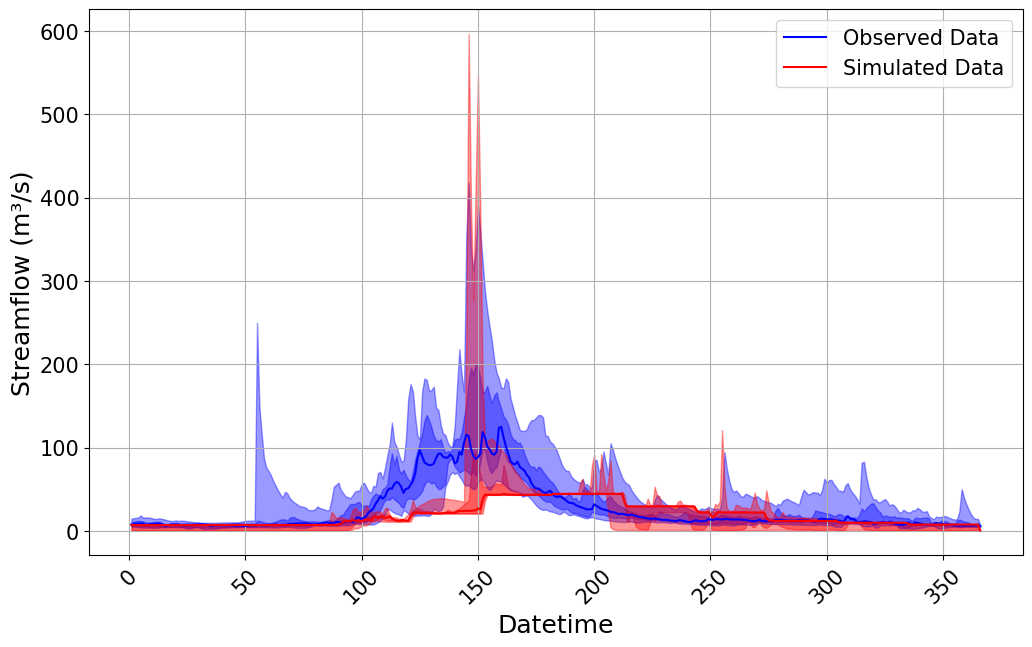

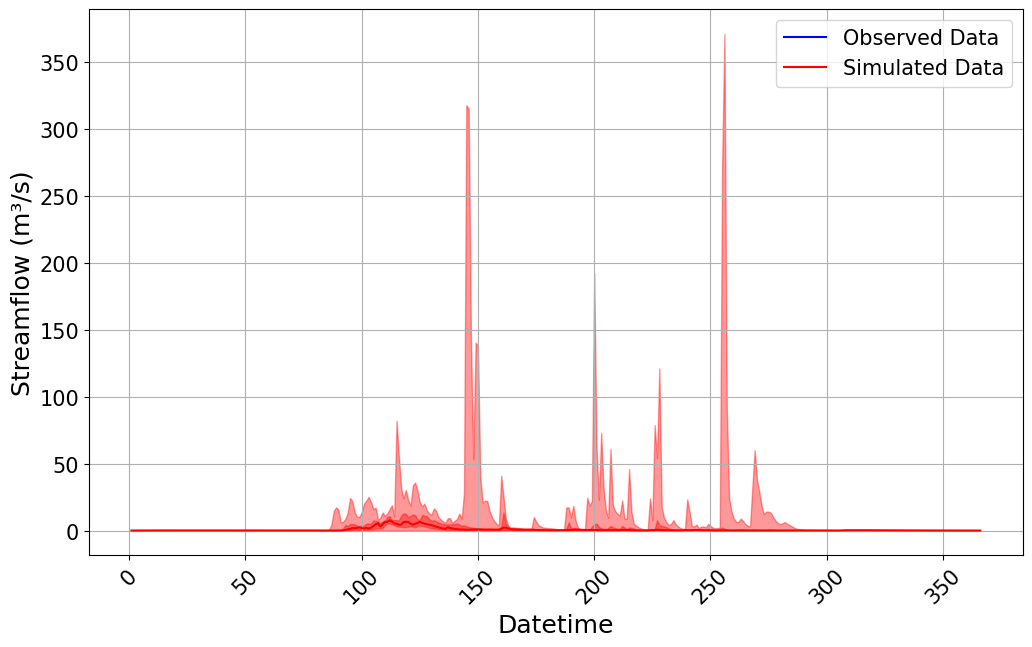

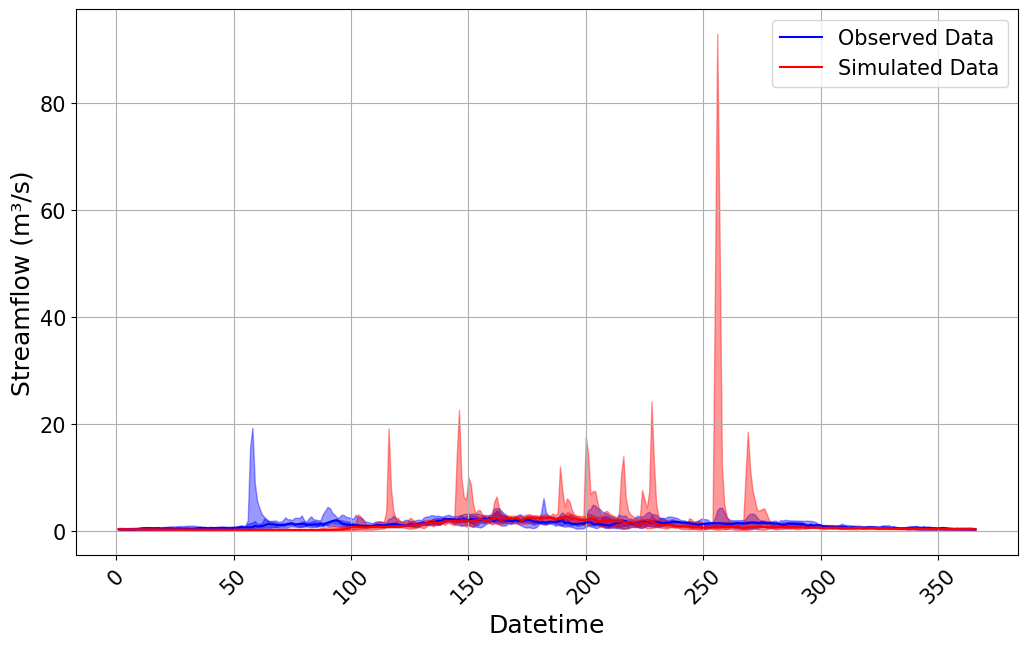

In [38]:
visuals.bounded_plot(
    lines = DATAFRAMES["LONG_TERM_MEDIAN"].iloc[:, [0, 1, 2, 3, 4, 5]],
    upper_bounds = [DATAFRAMES["LONG_TERM_Q75"], DATAFRAMES["LONG_TERM_MAX"]],
    lower_bounds = [DATAFRAMES["LONG_TERM_Q25"], DATAFRAMES["LONG_TERM_MIN"]],
#     upper_bounds = [DATAFRAMES["LONG_TERM_Q75"]],
#     lower_bounds = [DATAFRAMES["LONG_TERM_Q25"]],
#     title='Long Term Aggregation by days of the Year',
    linestyles=['r-', 'b-'],
    labels=['Datetime', 'Streamflow'],
    grid=True,
    transparency = [0.4, 0.4], #save = True
    )

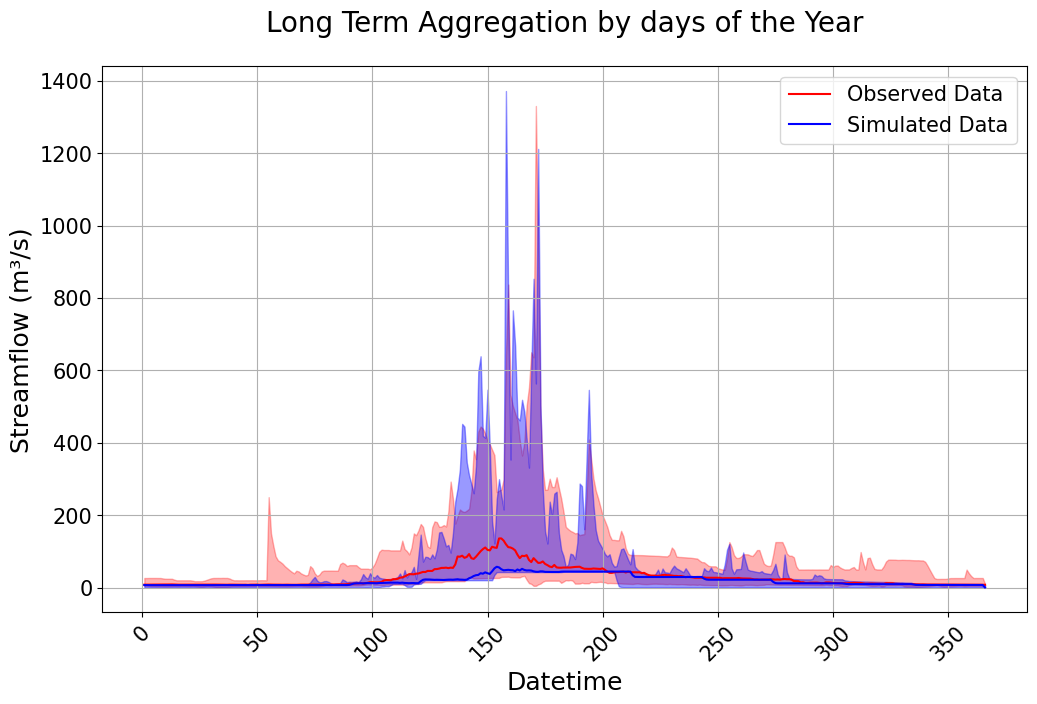

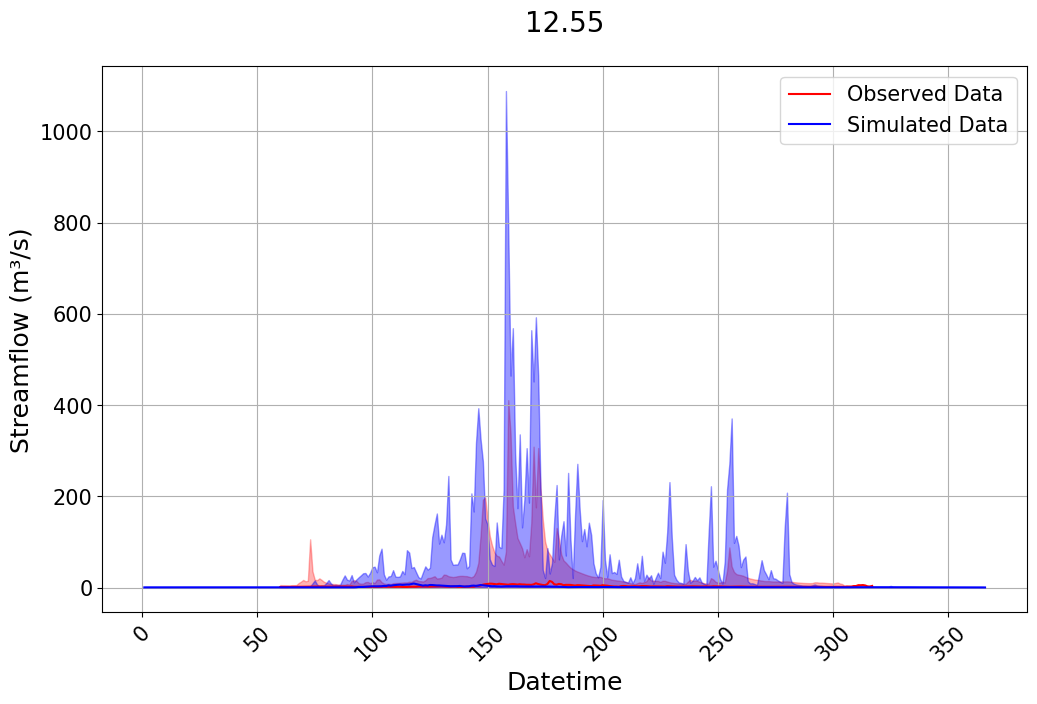

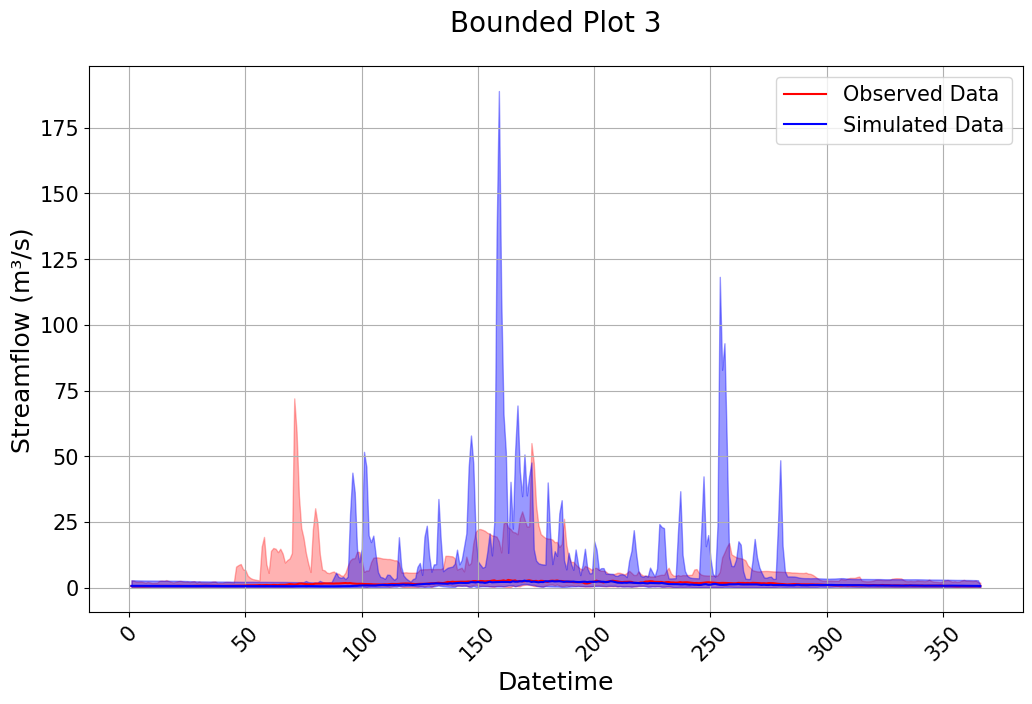

In [39]:
visuals.bounded_plot(
    lines = DATA_2["LONG_TERM_MEDIAN"].iloc[:, [0, 1, 2, 3, 4, 5]],
    upper_bounds = [DATA_2["LONG_TERM_MAX"]],
    lower_bounds = [DATA_2["LONG_TERM_MIN"]],
    # upper_bounds = [DATAFRAMES["LONG_TERM_Q75"]],
    # lower_bounds = [DATAFRAMES["LONG_TERM_Q25"]],
    title=['Long Term Aggregation by days of the Year', 12.55],
    linestyles=['b', 'r-'],
    labels=['Datetime', 'Streamflow'],
    grid=True,
    transparency = [0.4, 0.3],
    )

In [40]:
simulated[simulated.columns[0]].size

13515

22.225
16.2554455
1.4655384275449077
596.5143
25.79119
13.8


NameError: name 'Legend' is not defined

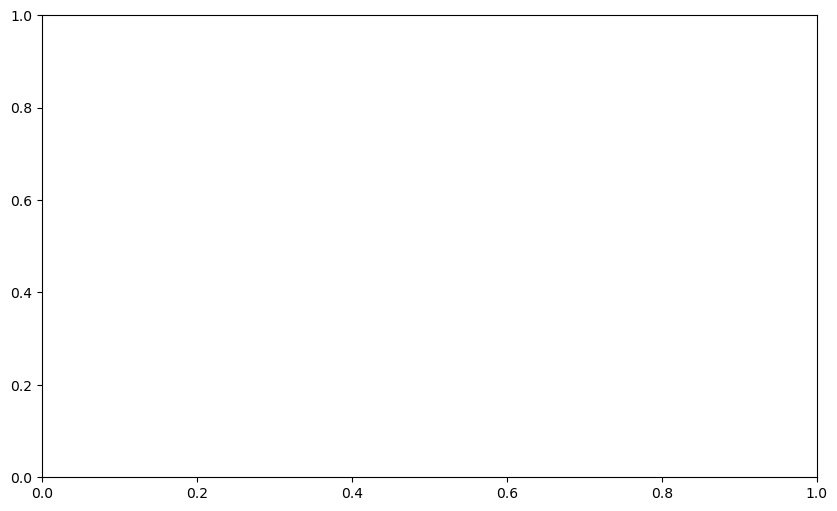

In [41]:
visuals.qqplot(
    merged_df = DATAFRAMES["DF"]['1981-01-01':'1990-12-31'].iloc[:, [0, 1]],
    title='Hydrograph of the time series from 1981-1990',
    linestyle = ['b.','r-.','r-'],
    labels=['Simulated Data Quantiles', 'Observed Data Quantiles'],
    linewidth = [.75, 1.25],
    legend = True, grid = True,
    save = True
    )